In [1]:
import os, os.path
import pandas as pd

def getData(DIR):
    solutions = dict()

    for name in os.listdir(DIR):
        if(name != '.gitkeep'):
            # get key for the dictionary
            parts = name.split('.')
            if(not parts[0] in solutions.keys()):
                solutions[parts[0]] = list()
            # get data
            name = f'{DIR}/{name}'
            data = pd.read_csv(name, sep=" ", header=None)
            data.columns = ["solution"]
            solutions[parts[0]].append((parts[1], data))
    return solutions

solutionsOne = getData('./output/test.one')
print(solutionsOne.keys())

dict_keys(['NL10', 'NL16', 'NL6', 'NL12', 'NL4', 'NL14'])


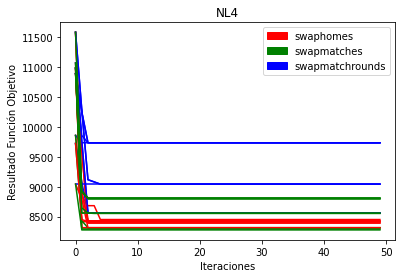

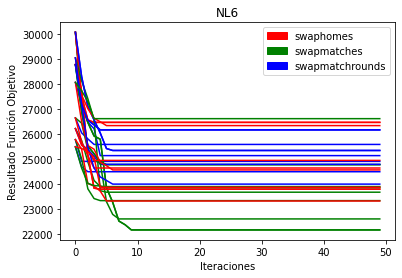

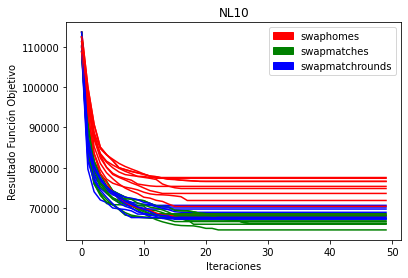

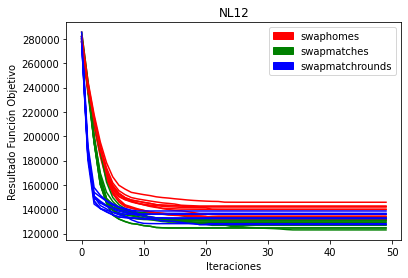

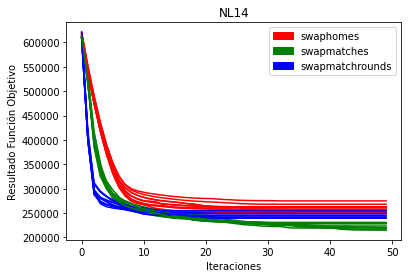

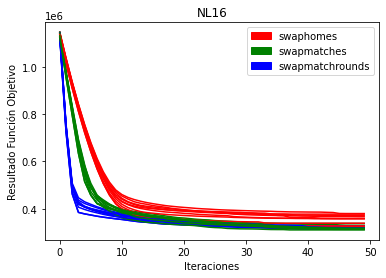

In [2]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def plotData(solutions, typeSwap, names):
    for arch in ['NL4', 'NL6', 'NL10', 'NL12', 'NL14', 'NL16']:
        for swapType, data in solutions[arch]:
            if(swapType == names[0]):
                color = 'red'
            elif(swapType == names[1]):
                color = 'green'
            else:
                color = 'blue'
            plt.plot(data[0:50], color=color)
        # options for the plot
        plt.title(arch)
        red_patch = mpatches.Patch(color='red', label=names[0])
        green_patch = mpatches.Patch(color='green', label=names[1])
        blue_patch = mpatches.Patch(color='blue', label=names[2])
        plt.legend(handles=[red_patch, green_patch, blue_patch])
        plt.xlabel('Iteraciones')
        plt.ylabel('Resultado Función Objetivo')
        plt.savefig(f'./img/{arch}.{typeSwap}.jpg')
        plt.show()

plotData(solutionsOne, 'one', ['swaphomes', 'swapmatches', 'swapmatchrounds'])

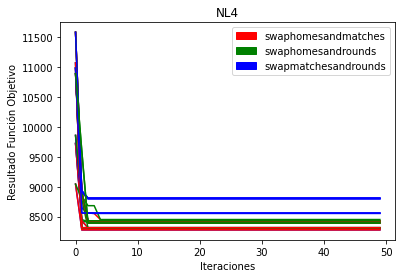

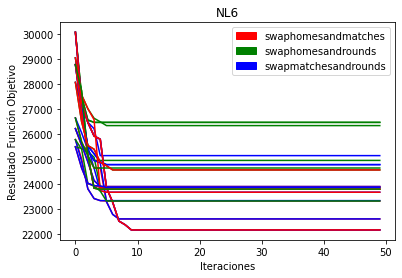

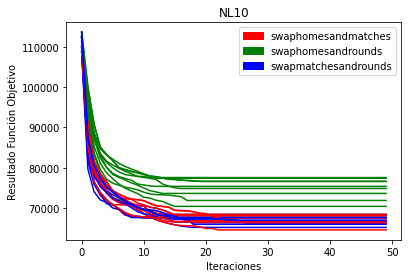

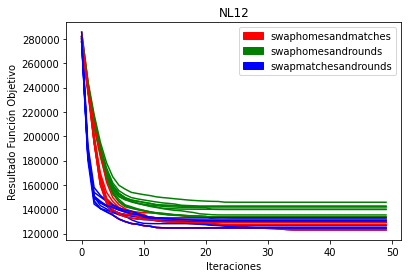

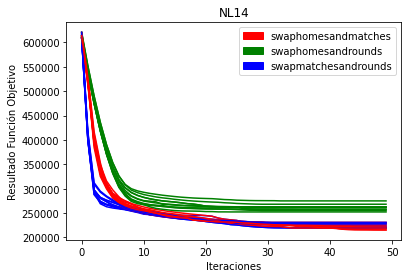

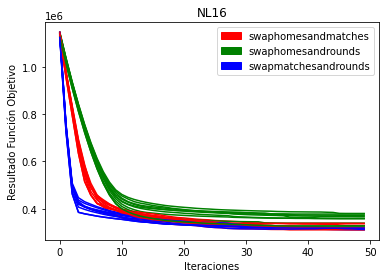

In [3]:
solutionsTwo = getData('./output/test.two')
plotData(solutionsTwo, 'two', ['swaphomesandmatches', 'swaphomesandrounds', 'swapmatchesandrounds'])